# Hanga!

In [28]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from ipywidgets import interactive, fixed

## Hanga taupori

In [234]:
def hanga_taupori(size=100, wip_mean=1000, wip_std=100, prop_min=0.05, lead_mean=14, lead_std=7, prop=0.1, name='anon', plot=True):
    wip = np.clip(np.random.normal(wip_mean, wip_std, size=size), 0, wip_mean+3*wip_std)
    lead = np.clip(np.random.normal(lead_mean, lead_std, size=size), 0, lead_mean+3*lead_std)
    prop = np.ones(size) * prop
    matrix = np.stack([wip, lead, prop], axis=1)
    df = pd.DataFrame(matrix, columns=['wip', 'lead', 'prop'])
    df['name'] = name
    if plot:
        sns.scatterplot(data=df, x='lead', y='wip', hue='name')
        plt.show()
    return df

In [235]:
interactive(hanga_taupori)

interactive(children=(IntSlider(value=100, description='size', max=300, min=-100), IntSlider(value=1000, descr…

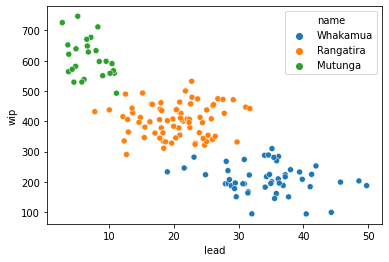

In [273]:
pop1 = hanga_taupori(size=50, wip_mean = 200, wip_std=50, lead_mean=35, lead_std=7, prop=0.1, name='Whakamua', plot=False)
pop2 = hanga_taupori(size=75, wip_mean = 400, wip_std=50, lead_mean=21, lead_std=5, prop=0.05, name='Rangatira', plot=False)
pop3 = hanga_taupori(size=25, wip_mean = 600, wip_std=50, lead_mean=7, lead_std=3, prop=0.05, name='Mutunga', plot=False)
pop = pd.concat([pop1, pop2, pop3])
sns.scatterplot(data=pop, x='lead', y='wip', hue='name')
plt.show()

## Hanga hoko


In [274]:
def hanga_hoko(pop, days=5*7, rate=50.0, delta=5.0, plot=True, name='anon'):
    hist = []
    revenue = 0
    for day in range(days):
        dtd = days - day
        rolls = np.random.uniform()
        sales = float(len(pop[(pop.wip >= rate) & (pop.lead >= dtd) & pop.prop >= rolls]))
        revenue += rate*sales
        hist.append((day, rate, sales, revenue))
        rate += delta
    data = np.array(hist)
    df = pd.DataFrame(data, columns=['day', 'rate', 'sales', 'revenue'])
    df['name'] = name
    return df

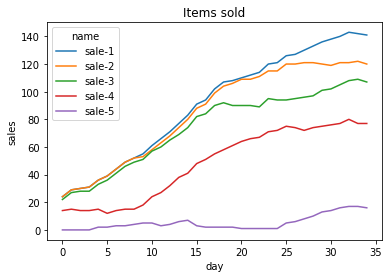

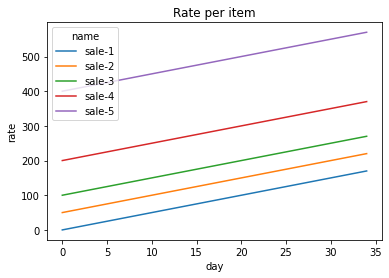

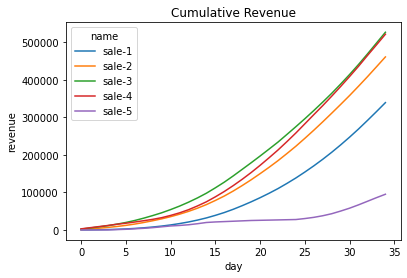

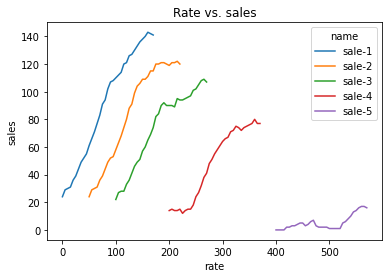

In [281]:
sale1 = hanga_hoko(pop, rate=0, name='sale-1')
sale2 = hanga_hoko(pop, rate=50, name='sale-2')
sale3 = hanga_hoko(pop, rate=100, name='sale-3')
sale4 = hanga_hoko(pop, rate=200, name='sale-4')
sale5 = hanga_hoko(pop, rate=400, name='sale-5')
sales = pd.concat([sale1, sale2, sale3, sale4, sale5])

sns.lineplot(data=sales, x='day', y='sales', hue='name')
plt.title('Items sold')
plt.show()

sns.lineplot(data=sales, x='day', y='rate', hue='name')
plt.title('Rate per item')
plt.show()

sns.lineplot(data=sales, x='day', y='revenue', hue='name')
plt.title('Cumulative Revenue')
plt.show()

sns.lineplot(data=sales, x='rate', y='sales', hue='name')
plt.title('Rate vs. sales')
plt.show()

## Whakangaro !

In [214]:
np.random.choice(len(pop), replace=False, size=10)

array([ 53,  11, 160, 144, 175, 170,  89,  30, 131, 118])